In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy import stats
import numpy as np

In [4]:
# Load Iris dataset from seaborn
df = sns.load_dataset('iris')

# Preview first few rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)
print("🔗 Correlation Matrix:\n", correlation_matrix)

🔗 Correlation Matrix:
               sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


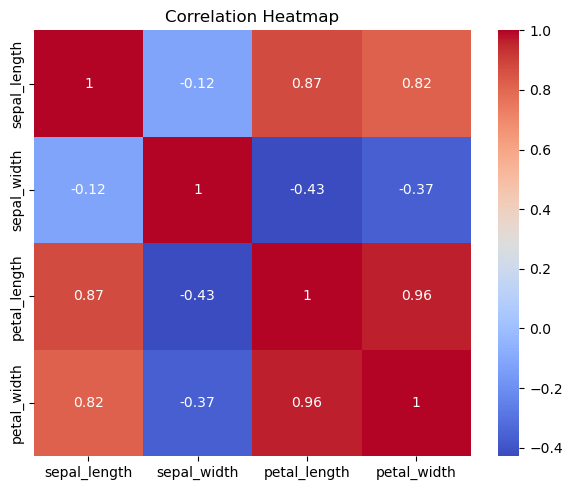

In [6]:
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [7]:
# Compare means across species
species_means = df.groupby('species').mean(numeric_only=True)
print(" Species-wise Mean Comparison:\n", species_means)

 Species-wise Mean Comparison:
             sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


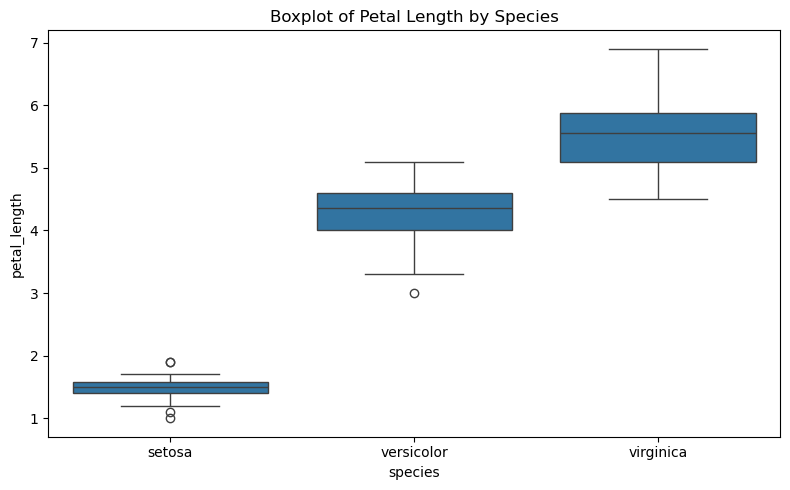

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='species', y='petal_length')
plt.title("Boxplot of Petal Length by Species")
plt.tight_layout()
plt.show()

In [10]:
# Define features and target
X = df[['sepal_length']]
y = df['petal_length']

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Print coefficients
print(f"Regression Coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R² Score: {model.score(X, y):.2f}")

Regression Coefficient: 1.86
Intercept: -7.10
R² Score: 0.76


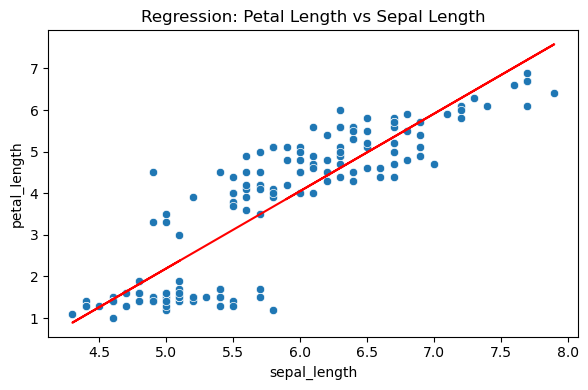

In [11]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='sepal_length', y='petal_length', data=df)
plt.plot(df['sepal_length'], model.predict(X), color='red')
plt.title("Regression: Petal Length vs Sepal Length")
plt.tight_layout()
plt.show()

In [12]:
# Standardize numeric columns
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df.select_dtypes('number')), columns=df.select_dtypes('number').columns)

# Compute Z-scores
z_scores = np.abs(stats.zscore(scaled_df))
outliers = (z_scores > 3).any(axis=1)

# Display outliers
print(f"Number of Outliers Detected: {outliers.sum()}")
df[outliers].head()

Number of Outliers Detected: 1


,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
